Fuzzy Logic Control of Wind Energy Systems

Fuzzy HCS Adaptation 

Graph Below: 


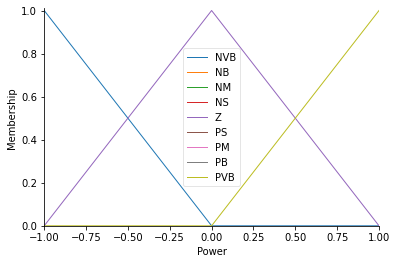

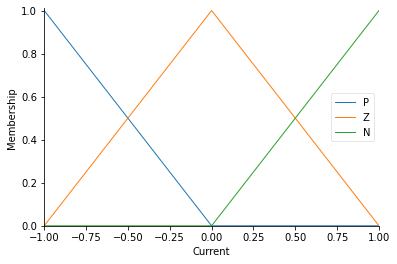

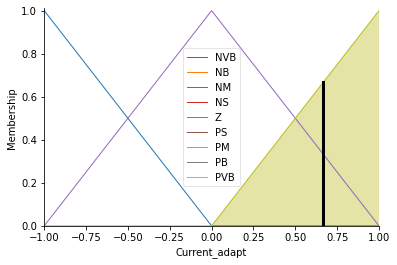

The Adapt Current is:  0.6666666666666666


In [11]:
import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as control
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


def HCS_adaptation(powerr, currentt):
    power = control.Antecedent(np.arange(-1,2,1), "Power")
    current = control.Antecedent(np.arange(-1,2,1), "Current")
    adapt_Current = control.Consequent(np.arange(-1,2,1), 'Current_adapt')

    power['NVB'] = fuzzy.trimf(power.universe,[-1,-1,-0.6])
    power['NB'] = fuzzy.trimf(power.universe,[-1,-0.6,-0.2])
    power['NM'] = fuzzy.trimf(power.universe,[-0.6,-0.2,-0.1])
    power['NS'] = fuzzy.trimf(power.universe,[-0.2,-0.1,0])
    power['Z'] = fuzzy.trimf(power.universe,[-0.1,0,0.1])
    power['PS'] = fuzzy.trimf(power.universe,[0,0.1,0.2])
    power['PM'] = fuzzy.trimf(power.universe,[0.1,0.3,0.6])
    power['PB'] = fuzzy.trimf(power.universe,[0.2,0.6,1])
    power['PVB'] = fuzzy.trimf(power.universe,[0.6,1,1])
    
    current['P'] = fuzzy.trimf(power.universe,[-1,-1,0])
    current['Z'] = fuzzy.trimf(power.universe,[-1,0,1])
    current['N'] = fuzzy.trimf(power.universe,[0,1,1])
    
    
    adapt_Current['NVB'] = fuzzy.trimf(adapt_Current.universe,[-1,-1,-0.6])
    adapt_Current['NB'] = fuzzy.trimf(adapt_Current.universe,[-1,-0.6,-0.2])
    adapt_Current['NM'] = fuzzy.trimf(adapt_Current.universe,[-0.6,-0.2,-0.1])
    adapt_Current['NS'] = fuzzy.trimf(adapt_Current.universe,[-0.2,-0.1,0])
    adapt_Current['Z'] = fuzzy.trimf(adapt_Current.universe,[-0.1,0,0.1])
    adapt_Current['PS'] = fuzzy.trimf(adapt_Current.universe,[0,0.1,0.2])
    adapt_Current['PM'] = fuzzy.trimf(adapt_Current.universe,[0.1,0.3,0.6])
    adapt_Current['PB'] = fuzzy.trimf(adapt_Current.universe,[0.2,0.6,1])
    adapt_Current['PVB'] = fuzzy.trimf(adapt_Current.universe,[0.6,1,1])
    
    
    
#     Rulebase for the fuzzy HCS adaptation
    
    rule1 = control.Rule(power['PVB'] & current['P'], adapt_Current['PVB'])
    rule2 = control.Rule(power['PVB'] & current['Z'], adapt_Current['PVB'])
    rule3 = control.Rule(power['PVB'] & current['N'], adapt_Current['NVB'])
    rule4 = control.Rule(power['PB'] & current['P'], adapt_Current['PB'])
    rule5 = control.Rule(power['PB'] & current['Z'], adapt_Current['PVB'])
    rule6 = control.Rule(power['PB'] & current['N'], adapt_Current['NB'])
    rule7 = control.Rule(power['PM'] & current['P'], adapt_Current['PM'])
    rule8 = control.Rule(power['PM'] & current['Z'], adapt_Current['PB'])
    rule9 = control.Rule(power['PM'] & current['N'], adapt_Current['NM'])
    rule10 = control.Rule(power['PS'] & current['P'], adapt_Current['PS'])
    rule11 = control.Rule(power['PS'] & current['Z'], adapt_Current['PM'])
    rule12 = control.Rule(power['PS'] & current['N'], adapt_Current['NS'])
    rule13 = control.Rule(power['Z'] & current['P'], adapt_Current['Z'])
    rule14 = control.Rule(power['Z'] & current['Z'], adapt_Current['Z'])
    rule15 = control.Rule(power['Z'] & current['N'], adapt_Current['Z'])
    rule16 = control.Rule(power['NS'] & current['P'], adapt_Current['NS'])
    rule17 = control.Rule(power['NS'] & current['Z'], adapt_Current['NM'])
    rule18 = control.Rule(power['NS'] & current['N'], adapt_Current['PS'])
    rule19 = control.Rule(power['NM'] & current['P'], adapt_Current['NM'])
    rule20 = control.Rule(power['NM'] & current['Z'], adapt_Current['NB'])
    rule21 = control.Rule(power['NM'] & current['N'], adapt_Current['PM'])
    rule22 = control.Rule(power['NB'] & current['P'], adapt_Current['NB'])
    rule23 = control.Rule(power['NB'] & current['Z'], adapt_Current['NVB'])
    rule24 = control.Rule(power['NB'] & current['N'], adapt_Current['PB'])
    rule25 = control.Rule(power['NVB'] & current['P'], adapt_Current['NVB'])
    rule26 = control.Rule(power['NVB'] & current['Z'], adapt_Current['NVB'])
    rule27 = control.Rule(power['NVB'] & current['N'], adapt_Current['PVB'])
    
    
    
    rules = [rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, 
             rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, 
             rule24, rule25, rule26, rule27]
    
    
    x = control.ControlSystem(rules)
    y = control.ControlSystemSimulation(x)
    
    y.input['Power'] = powerr
    y.input['Current'] = currentt
    y.compute()
    
    print("Graph Below: ")
    power.view()
    current.view()
    adapt_Current.view(sim=y)
    plt.show()
    
    
    return (y.output['Current_adapt'])


current_adapt= HCS_adaptation(1,-1)
print("The Adapt Current is: ", current_adapt)

Fuzzy Based MPPT (Maximum Power Point Tracking)

current error:  4.474809852062556
current error:  4.018175648459217
current error:  3.6294993676822758
current error:  3.293860058407625
current error:  2.9729282228350566
current error:  2.668946859654925
current error:  2.384264189332077
current error:  2.1210503612994627
current error:  1.881021108833921
current error:  1.6651826467599307
current error:  1.47361762988101
current error:  1.3053330579769367
current error:  1.1581926711279182
current error:  1.0289661055373334
current error:  0.9135459876848706
current error:  0.8073883848298795
current error:  0.7061722099358048
current error:  0.6065415800607155
current error:  0.5067014127443349


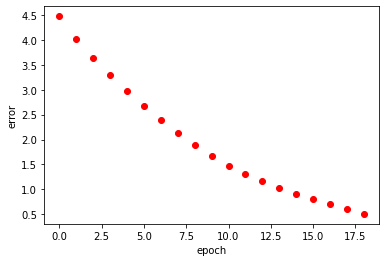

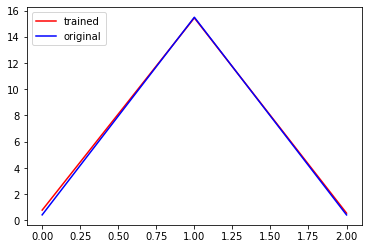

RMSE:  0.22468964532790608


In [12]:
import numpy as np
import pandas as pd
import skfuzzy as fuzzy
from skfuzzy import control as control
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from membership import membershipfunction
import anfis
import math
import warnings
warnings.filterwarnings('ignore')


low_mean = [0,0.1538,0.1538]
moder_mean = [0,0.4248,0.4248]
high_mean = [0,1.136,1.136]

low_var = [0,0.0354,0.0354]
moder_var = [0,0.6263,0.6263]
high_var = [0,15.49,15.49]

low_cons = [0,0.02694,0.02694]
moder_cons = [0,0.4211,0.4211]
high_cons = [0,0.7743,0.7743]

def mppt(rotor_speed_ip):
    
    #Antecedents and Consequents    
    rotor_speed = control.Antecedent(np.arange(0,1,1), 'Rotor_Speed')
    mean = control.Antecedent(np.arange(0,1,1), "Mean")
    variance = control.Antecedent(np.arange(0,1,1), "Variance")
    cons = control.Consequent(np.arange(0,1,1), "Consequent")
    
    
    #Dataset
    data = [[0.1538, 1.136, 0.4248], 
            [0.0354, 0.6263, 15.49], 
            [0.02694 , 0.7743, 0.4211]]
    df = pd.DataFrame(data, columns = ['Variance', 'Mean', 'Consequent'])
    
    
    rotor_speed['Low'] = fuzzy.gaussmf(rotor_speed_ip, 0.1538, 0.0354)
    rotor_speed['Moderate'] = fuzzy.gaussmf(rotor_speed_ip, 0.4248, 15.49)
    rotor_speed['High'] = fuzzy.gaussmf(rotor_speed_ip, 1.136, 0.6263)
    
    mean['Low'] = fuzzy.trimf(mean.universe, low_mean)
    mean['Moderate'] = fuzzy.trimf(mean.universe, moder_mean)
    mean['High'] = fuzzy.trimf(mean.universe, high_mean)
    
    variance['Low'] = fuzzy.trimf(variance.universe, low_var)
    variance['Moderate'] = fuzzy.trimf(variance.universe, moder_var)
    variance['High'] = fuzzy.trimf(variance.universe, high_var)
    
    cons['Low'] = fuzzy.trimf(cons.universe, low_cons)
    cons['Moderate'] = fuzzy.trimf(cons.universe, moder_cons)
    cons['High'] = fuzzy.trimf(cons.universe, high_cons)
    
    
    #Rules
    Rule1 = control.Rule(mean['Low'] & variance['Low'], cons['Low'])
    Rule2 = control.Rule(mean['Low'] & variance['Moderate'], cons['Low'])
    Rule3 = control.Rule(mean['Low'] & variance['High'], cons['Moderate'])
    Rule4 = control.Rule(mean['Moderate'] & variance['Low'], cons['Low'])
    Rule5 = control.Rule(mean['Moderate'] & variance['Moderate'], cons['Moderate'])
    Rule6 = control.Rule(mean['Moderate'] & variance['High'], cons['Moderate'])
    Rule7 = control.Rule(mean['High'] & variance['Low'], cons['Moderate'])
    Rule8 = control.Rule(mean['High'] & variance['Moderate'], cons['High'])
    Rule9 = control.Rule(mean['High'] & variance['High'], cons['High'])
    
    rules = [Rule1,Rule2,Rule3,Rule4,Rule5,Rule6,Rule7,Rule8,Rule9]
    
    
    x = control.ControlSystem(rules)
    y = control.ControlSystemSimulation(x)
    
#     y.input['Rotor_Speed'] = rotor_speed_ip
#     y.compute()
    
    
    #Gaussin Membership
    mfc = [[['gaussmf', {'mean' : 0.1538, 'sigma':0.0354}],
           ['gaussmf', {'mean' : 1.136, 'sigma':0.6263}],
           ['gaussmf', {'mean' : 0.4248, 'sigma':15.49}]],
          [['gaussmf', {'mean' : 0.1538, 'sigma':0.0354}],
           ['gaussmf', {'mean' : 1.136, 'sigma':0.6263}],
           ['gaussmf', {'mean' : 0.4248, 'sigma':15.49}]]]
    mfc = membershipfunction.MemFuncs(mfc)
    consequent = df.pop('Consequent')
    
    #ANFIS
    anf = anfis.ANFIS(df, consequent, mfc)
    pred_train = anf.trainHybridJangOffLine(epochs=20)

    #Plotting
    anf.plotErrors()
    anf.plotResults()
    
    #RMSE
    mse = mean_squared_error(consequent, pred_train)
    rmse = math.sqrt(mse)
    print("RMSE: ", rmse)
    
mppt(1.136)